<a href="https://colab.research.google.com/github/hbhb0311/Visualization/blob/main/post_covid_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

동적 그래프 확인 링크 : https://colab.research.google.com/drive/1HwCKj1IdOwcLllXnIAdEpiXv4PnrFsza?usp=sharing

In [2]:
# 한글로 그래프 제목 입력해도 글씨 깨지지 않게 함

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## 실행 후 런타임 재시작하고 다음 셀부터 실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns                
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
fontname = 'NanumBarunGothic'

In [2]:
os.chdir('./dataset/코로나') # 데이터가 있는 주소로 바꿔줌
os.getcwd()

'/content/drive/MyDrive/멋쟁이사자처럼/dataset/코로나'

In [3]:
address = pd.read_csv('./adstrd_master.csv')
card = pd.read_csv('./card_20200717.csv')
fpopl = pd.read_csv('./fpopl.csv')
time = pd.read_csv('./Time.csv')
timep = pd.read_csv('./TimeProvince.csv')

# 코로나 확진자 현황

## 전국 기준

In [4]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [5]:
time['pconfirmed'] = 0

for i in range(time.shape[0] - 1):
  time.iloc[i+1, -1] = time.iloc[i+1, 4] - time.iloc[i, 4]

time.head()

,date,time,test,negative,confirmed,released,deceased,pconfirmed
0,2020-01-20,16,1,0,1,0,0,0
1,2020-01-21,16,1,0,1,0,0,0
2,2020-01-22,16,4,3,1,0,0,0
3,2020-01-23,16,22,21,1,0,0,0
4,2020-01-24,16,27,25,2,0,0,1


In [6]:
time['week'] = pd.to_datetime(time['date']).dt.week
time_w = time.groupby('week')['pconfirmed'].sum()
time_w

week
4        2
5       12
6       12
7        2
8      573
9     3134
10    3398
11     992
12     771
13     686
14     654
15     275
16     149
17      67
18      65
19      81
20     176
21     140
22     278
23     308
24     309
25     336
26     294
27      85
Name: pconfirmed, dtype: int64

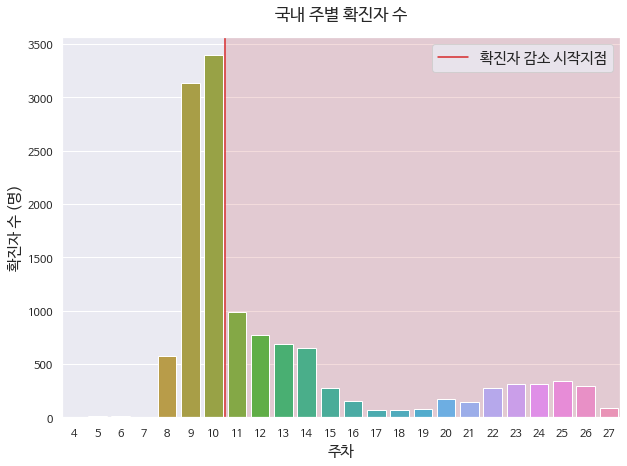

In [7]:
sns.set(style='darkgrid', font = fontname)
plt.figure(figsize = (10, 7))
plt.axvline(6.5, label='확진자 감소 시작지점', color='tab:red', linestyle = '-')
plt.axvspan(6.5, 23.5, facecolor='r', alpha=0.2)
sns.barplot(x = time_w.index, y = time_w.values)

plt.title('국내 주별 확진자 수', fontsize = 17, y =1.03)
plt.ylabel('확진자 수 (명)', fontsize = 15)
plt.xlabel('주차', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

## 서울시 기준

### 주별

In [8]:
timep.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,서울,0,0,0
1,2020-01-20,16,부산,0,0,0
2,2020-01-20,16,대구,0,0,0
3,2020-01-20,16,인천,1,0,0
4,2020-01-20,16,광주,0,0,0


In [9]:
times = timep[timep['province'] == '서울']
times.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,서울,0,0,0
17,2020-01-21,16,서울,0,0,0
34,2020-01-22,16,서울,0,0,0
51,2020-01-23,16,서울,0,0,0
68,2020-01-24,16,서울,0,0,0


In [10]:
times['pconfirmed'] = 0

for i in range(times.shape[0] - 1):
  times.iloc[i+1, -1] = times.iloc[i+1, 3] - times.iloc[i, 3]

times.head()

,date,time,province,confirmed,released,deceased,pconfirmed
0,2020-01-20,16,서울,0,0,0,0
17,2020-01-21,16,서울,0,0,0,0
34,2020-01-22,16,서울,0,0,0,0
51,2020-01-23,16,서울,0,0,0,0
68,2020-01-24,16,서울,0,0,0,0


In [11]:
times['week'] = pd.to_datetime(times['date']).dt.week
times_w = times.groupby('week')['pconfirmed'].sum()
times_w

week
4       0
5       5
6       9
7       0
8      17
9      56
10     33
11    127
12     77
13     86
14    142
15     50
16     22
17      5
18      8
19     26
20     72
21     33
22     93
23    113
24    139
25    106
26     79
27     14
Name: pconfirmed, dtype: int64

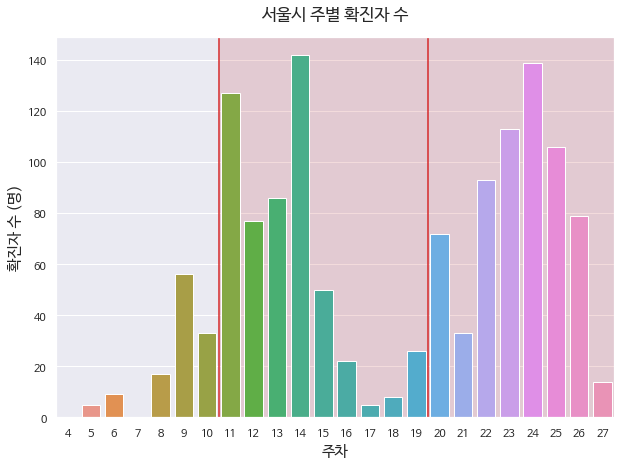

In [12]:
plt.figure(figsize = (10, 7))
plt.axvline(6.5, color='tab:red', linestyle = '-')
plt.axvline(15.5, color='tab:red', linestyle = '-')
plt.axvspan(6.5, 23.5, facecolor='r', alpha=0.2)

sns.barplot(x = times_w.index, y = times_w.values)

plt.title('서울시 주별 확진자 수', fontsize = 17, y =1.03)
plt.ylabel('확진자 수 (명)', fontsize = 15)
plt.xlabel('주차', fontsize = 15)
plt.show()

전국 기준으로 보면 11주차부터 확진자가 감소하는 것으로 보이지만(신천지 집단감염), 서울시 기준으로 보면 19주(이태원 클럽 집단감염) 이후 확진자가 다시 증가하는 것을 보임

따라서 서울시 기준으로 확진자 `확산세`를 보이는 `11주`, `20주`차의 소비 변화와 `감소세`를 보이는 `17주`차의 소비변화를 확인하려고 함

### 월별

In [13]:
times['month'] = pd.to_datetime(times['date']).dt.month
times.tail()

,date,time,province,confirmed,released,deceased,pconfirmed,week,month
2686,2020-06-26,0,서울,1267,843,7,17,26,6
2703,2020-06-27,0,서울,1284,911,7,17,26,6
2720,2020-06-28,0,서울,1298,923,7,14,26,6
2737,2020-06-29,0,서울,1305,942,7,7,27,6
2754,2020-06-30,0,서울,1312,985,7,7,27,6


In [14]:
times_m = times.groupby('month')['pconfirmed'].sum()
times_m

month
1      4
2     73
3    373
4    183
5    228
6    451
Name: pconfirmed, dtype: int64

In [15]:
colors = ['lightslategray',] * 6
colors[5] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x= times_m.index,
    y= times_m.values,
    text = times_m.values,
    marker_color=colors 
)])
fig.update_traces(texttemplate='%{text:s}', textposition='auto')
fig.update_layout(title_text='서울시 월별 확진자 수', xaxis_title="월",
    yaxis_title="확진자 수 (명)",
    font=dict(size=15))

월별로 서울시 확진자 수 확인해도 **6월**에 가장 많은 것을 알 수 있음

# 업종별 소비 변화

In [16]:
card.columns = ['날짜', '행정동코드', '행정동명', '업종코드', '업종명', '결제횟수', '결제금액']
card.head()

,날짜,행정동코드,행정동명,업종코드,업종명,결제횟수,결제금액
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000


In [17]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713952 entries, 0 to 3713951
Data columns (total 7 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   날짜      int64 
 1   행정동코드   int64 
 2   행정동명    object
 3   업종코드    int64 
 4   업종명     object
 5   결제횟수    int64 
 6   결제금액    int64 
dtypes: int64(5), object(2)
memory usage: 198.3+ MB


In [18]:
card.isnull().sum()

날짜       0
행정동코드    0
행정동명     0
업종코드     0
업종명      0
결제횟수     0
결제금액     0
dtype: int64

In [19]:
card['날짜'] = pd.to_datetime(card['날짜'], format = '%Y%m%d')
card['주'] = card['날짜'].dt.week
card.head()

,날짜,행정동코드,행정동명,업종코드,업종명,결제횟수,결제금액,주
0,2020-01-04,1174066000,성내3동,7041,약국,463,5843230,1
1,2020-01-04,1174066000,성내3동,7022,치과의원,33,7835550,1
2,2020-01-04,1174066000,성내3동,7021,한의원,53,4589800,1
3,2020-01-04,1174066000,성내3동,7020,의원,339,9267240,1
4,2020-01-04,1174066000,성내3동,6110,자동차정비,19,4441000,1


In [20]:
card = card[card['주'] >= 9]
card.head()

,날짜,행정동코드,행정동명,업종코드,업종명,결제횟수,결제금액,주
783632,2020-02-24,1126058000,상봉1동,4020,슈퍼 마켓,282,2752880,9
783633,2020-02-24,1174065000,성내2동,7102,미 용 원,55,2154400,9
783634,2020-02-24,1144066000,서교동,9998,기타전문점,16,401600,9
783635,2020-02-24,1165053000,서초3동,8005,중국음식,225,6839290,9
783636,2020-02-24,1147065000,신정4동,8005,중국음식,120,2691600,9


In [21]:
card.groupby('업종명')['결제횟수'].sum().sort_values()

업종명
중고자동차위탁판매            1
P2P송금                3
택시회사                 6
통신기기무이자할부            7
외국인전용가맹점             9
               ...    
서양음식          39732248
택   시         44891301
편 의 점         56985778
기타전문점         68914763
인터넷P/G       107047287
Name: 결제횟수, Length: 258, dtype: int64

## 결제 횟수가 0인 행 제거

In [22]:
drop_rows = card[card['업종명'].str.contains('비씨카드정산용|카지노')].index.tolist()

In [23]:
card = card.drop(drop_rows, axis = 0)
card.groupby('업종명')['결제횟수'].sum().sort_values()

업종명
중고자동차위탁판매            1
P2P송금                3
택시회사                 6
통신기기무이자할부            7
외국인전용가맹점             9
               ...    
서양음식          39732248
택   시         44891301
편 의 점         56985778
기타전문점         68914763
인터넷P/G       107047287
Name: 결제횟수, Length: 258, dtype: int64

## '업종분류명' 열 추가(기준 정해 업종 묶어줌)

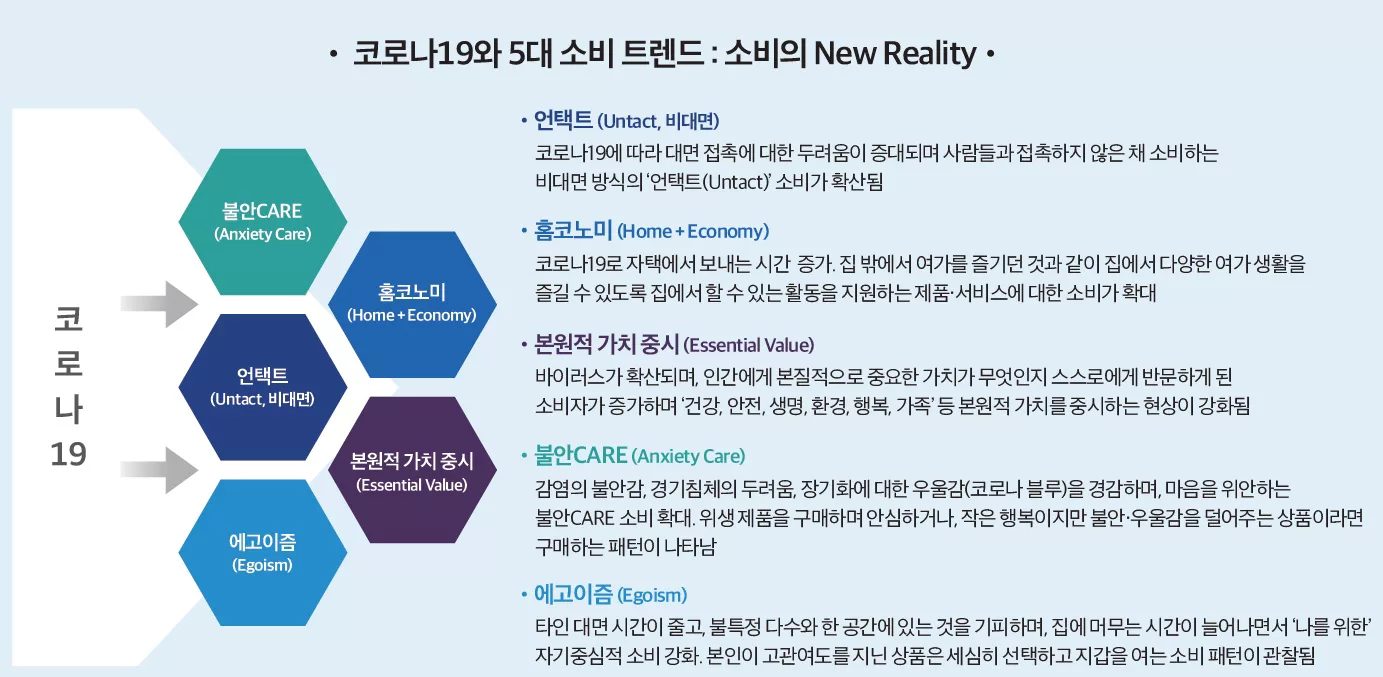

In [24]:
from IPython.display import Image
Image('./img/Untitled.png')

출처 : https://home.kpmg/kr/ko/home/newsletter-channel/202008/market-reader.html

- 홈코노미 : 집에 있는 시간이 길어지며 `집에서의 활동`을 지원하는 것에 대한 관심 증대 → 업종분류명에 '집' 추가
- 에고이즘 : 타인 대면 시간이 줄면서, `'나를 위한'` 소비 강화 → 업종분류명에 '개인취미' 추가
- 본원적 가치 중시 : 바이러스가 확산되며 인간에게 `본질적으로 중요한 가치`가 무엇인지 반문하는 소비자 증가 → 업종분류명에 '개인취미' 추가

In [25]:
def category(name):
  if ('음식' in name) | ('한식' in name)| ('일식' in name)| ('한정식' in name):
    return '음식점'
  elif ('주점' in name) | ('노래방' in name)| ('칵테일바' in name)| ('주류판매점' in name):
    return '유흥'
  elif ('슈퍼' in name)| ('대형할인점' in name)| ('기타음료식품' in name)| ('정 육 점' in name)| ('농축수산품' in name)| ('편 의 점' in name)\
    | ('스넥' in name)| ('제과점' in name):
    return '음식점대체재'
  elif ('동물' in name):
    return '동물'
  elif ('약국' in name) | ('의원' in name)| ('의료 용품' in name)| ('병원' in name):
    return '의료'
  elif ('화 장 품' in name) | ('미 용 원' in name)| ('악세 사리' in name)| ('미용' in name):
    return '뷰티'
  elif ('스포츠' in name) | ('헬스 크럽' in name)| ('테니스 장' in name)|('골프' in name):
    return '스포츠'
  elif ('당구장' in name) | ('볼 링 장' in name)| ('영화관' in name)| ('티켓' in name)| ('수 영 장' in name):
    return '단체취미'
  elif ('골동품 점' in name)| ('악 기 점' in name):
    return '개인취미'
  elif ('기타가구' in name) |('주방 용구' in name):
    return '집'
  elif ('자동차' in name)| ('카인테리어' in name)| ('신차' in name):
    return '자동차'
  else:
    return name 

In [26]:
cate_man = ['음식점', '유흥', '음식점대체재', '의료', '뷰티', '스포츠', '단체취미', '개인취미', '집', '자동차', '동물']

In [27]:
card['업종분류명'] = card['업종명'].apply(category)
card.head()

,날짜,행정동코드,행정동명,업종코드,업종명,결제횟수,결제금액,주,업종분류명
783632,2020-02-24,1126058000,상봉1동,4020,슈퍼 마켓,282,2752880,9,음식점대체재
783633,2020-02-24,1174065000,성내2동,7102,미 용 원,55,2154400,9,뷰티
783634,2020-02-24,1144066000,서교동,9998,기타전문점,16,401600,9,기타전문점
783635,2020-02-24,1165053000,서초3동,8005,중국음식,225,6839290,9,음식점
783636,2020-02-24,1147065000,신정4동,8005,중국음식,120,2691600,9,음식점


## 업종별 소비 변화 시각화

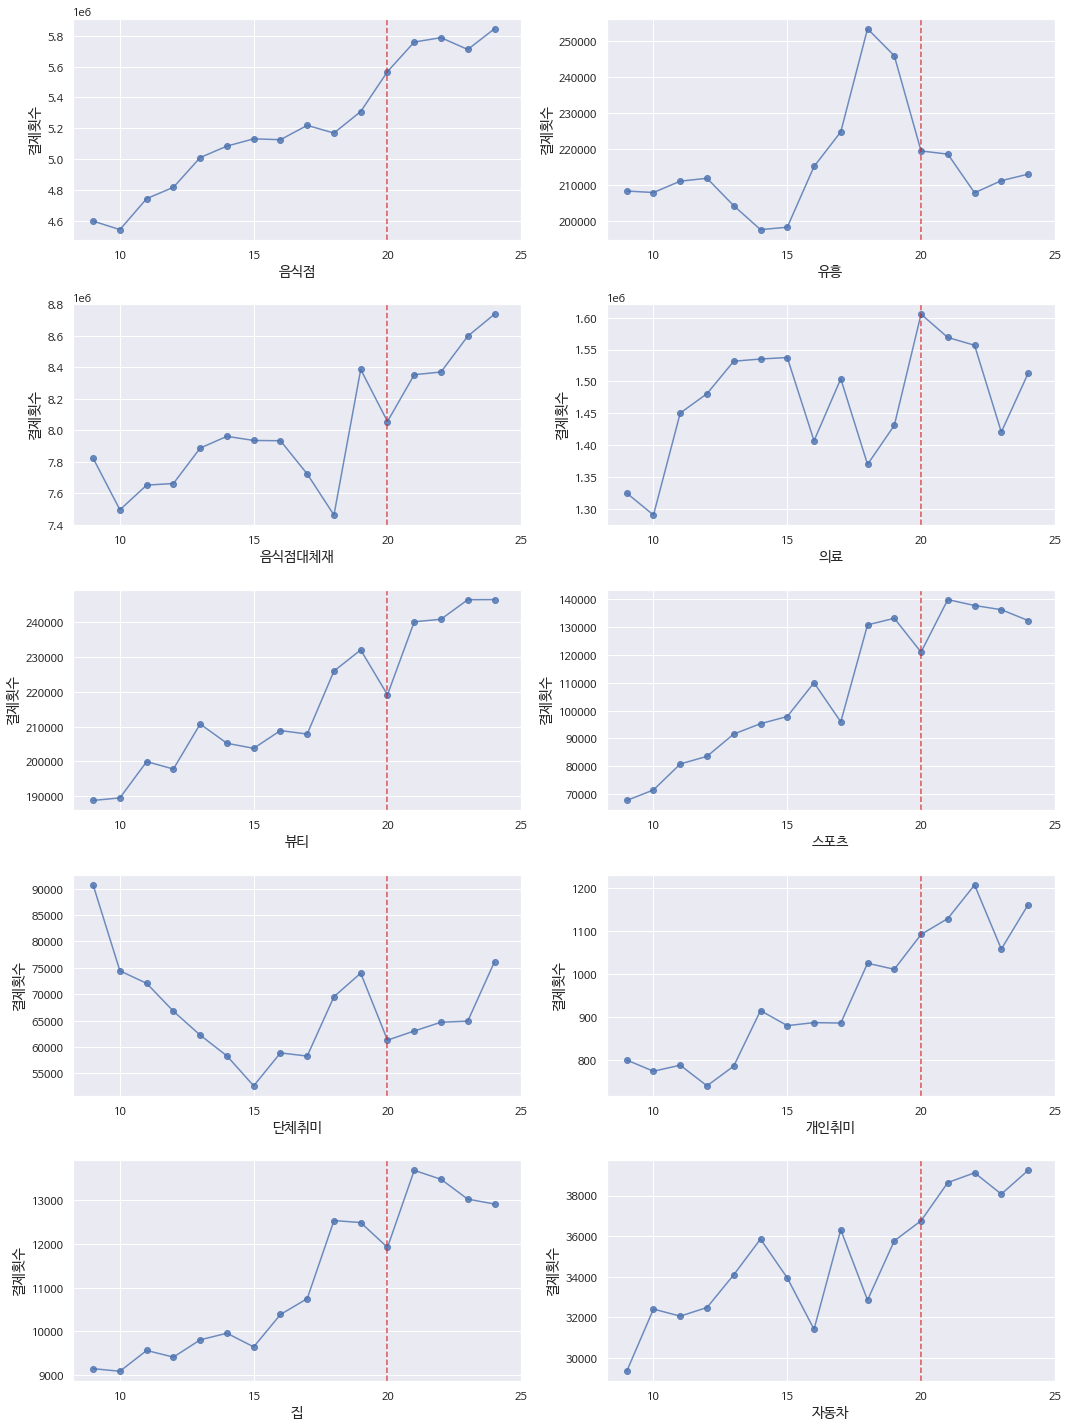

In [28]:
plt.figure(figsize = (15, 20))

for i in range(1,11):
  df = card[card['업종분류명'] == cate_man[i-1]].groupby('주')['결제횟수'].sum()
  plt.subplot(5,2,i)
  plt.plot(df.index, df.values, 'o-', alpha = 0.8)
  plt.axvline(20, color='tab:red', linestyle = '--', alpha = 0.8)
  plt.xticks(np.arange(10, 26, 5), np.arange(10, 26, 5))
  plt.xlabel(cate_man[i-1], fontsize = 14)
  plt.ylabel('결제횟수', fontsize = 14)

plt.tight_layout()
plt.show()

서울시 2차 확산이 발생한 20주 기준으로 보았을 때, 결제 횟수의 증감률이 다양하게 나타남

## 업종별 소비 '변화율' 시각화

In [29]:
def cate_df(week):

  lst = []
  for idx, val in enumerate(cate_man):
    data = card[card['업종분류명'] == val].groupby('주')['결제횟수'].sum()
    lst.append(((data.loc[week] - data.loc[week - 2])/data.loc[week - 2]) * 100)
  
  dic = dict()
  for idx, val in enumerate(cate_man):
    dic[val] = lst[idx]
  
  dic_sort = sorted(dic.items(), reverse=True, key= lambda item: item[1])
  dic_sort = dict(dic_sort)
  dic_key = list(dic_sort.keys())
  dic_val = list(dic_sort.values())

  df = pd.DataFrame(index = range(0,len(cate_man)), columns = ['Industry name', 'Increase/decrease rate'])

  for i in range(len(dic_key)):
    df.iloc[i, 0] = dic_key[i]
    df.iloc[i, 1] = dic_val[i]
  
  return df

In [30]:
def cate_bar(df, week):
  colors = ['lightgray',] * 11

  for i in range(3):
    colors[i] = 'crimson'

  for i in range(8, 11):
    colors[i] = 'crimson'

  fig = go.Figure(data=[go.Bar(
      x= df['Industry name'],
      y= df['Increase/decrease rate'],
      text = df['Increase/decrease rate'],
      marker_color = colors
  )])

  fig.update_traces(texttemplate='%{text:.2f}', textposition='auto')
  fig.update_layout(title_text=f'2주동안의 소비 변화율 (기준: {week}주)',  xaxis_title="업종명",
    yaxis_title="변화율", font=dict(size=15))
  fig.show()

### 확진자 증가 추세시

In [31]:
cate_df(11)

,Industry name,Increase/decrease rate
0,스포츠,19.2345
1,의료,9.49296
2,자동차,9.27505
3,뷰티,5.91342
4,집,4.56087
5,음식점,3.16256
6,유흥,1.31672
7,동물,1.00493
8,개인취미,-1.5
9,음식점대체재,-2.17909


In [32]:
cate_bar(cate_df(11), 11)

In [33]:
cate_bar(cate_df(20), 20)

1차 확산 때보다 2차 확산 때 유흥분야의 소비가 더 크게 감소(유흥주점에서 집단감염이 발생한 영향)

1차 확산 때보다 2차 확산 때 의료분야의 소비가 더 크게 증가(코로나 감염에 대한 경각심 상승?)

1차 확산 때보다 2차 확산 때 개인 취미 분야의 소비 증가

In [34]:
pol = pd.read_csv('./Policy.csv')
pol.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [35]:
pol['week'] = pd.to_datetime(pol['start_date']).dt.week
pol.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date,week
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19,1
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27,4
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22,5
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN,8
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN,6


In [36]:
# 20주쯤에 bar & club 영업금지 정책이 있었음 
pol[(pol['week'] >= 19) & (pol['week'] <= 21)]

,policy_id,country,type,gov_policy,detail,start_date,end_date,week
31,32,Korea,Social,Social Distancing Campaign,Weak(1st),2020-05-06,NaN,19
53,54,Korea,Administrative,Close bars and clubs,administrative order to close bars and clubs,2020-05-08,2020-06-07,19
54,55,Korea,Administrative,local government Administrative orders,Gathering limited administrative orders for nu...,2020-05-16,NaN,20
55,56,Korea,Administrative,Close karaoke,Ban on gathering for 2 weeks for all karaoke a...,2020-05-21,2020-06-03,21


### 확진자 감소 추세시

In [37]:
cate_bar(cate_df(17), 17)

유흥 분야와 단체취미 분야에서 소비가 크게 증가함
<br>
의료 분야의 소비가 감소함

# 연령별 소비 

In [38]:
fpopl.tail()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt
9448687,20200203,10,M,age_35,11215780,350.0
9448688,20200203,10,F,age_35,11560650,118.0
9448689,20200203,10,F,age_35,11545620,47.0
9448690,20200203,10,F,age_35,11380580,265.0
9448691,20200203,10,F,age_35,11,NaN


In [39]:
fpopl.isnull().sum()

base_ymd           0
tmzon_se_code      0
sexdstn_se_code    0
agrde_se_code      0
adstrd_code        0
popltn_cascnt      1
dtype: int64

In [40]:
fpopl = fpopl.drop(9448691, axis = 0)
fpopl.isnull().sum()

base_ymd           0
tmzon_se_code      0
sexdstn_se_code    0
agrde_se_code      0
adstrd_code        0
popltn_cascnt      0
dtype: int64

In [41]:
address.head()

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
0,11110515.0,청운효자동,서울특별시,종로구
1,11110530.0,사직동,서울특별시,종로구
2,11110540.0,삼청동,서울특별시,종로구
3,11110550.0,부암동,서울특별시,종로구
4,11110560.0,평창동,서울특별시,종로구


In [42]:
fpopl = pd.merge(fpopl, address, left_on = 'adstrd_code', right_on = 'adstrd_code')
fpopl.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,adstrd_nm,brtc_nm,signgu_nm
0,20200101,0,M,age_00,11650560,15.0,반포1동,서울특별시,서초구
1,20200101,0,F,age_00,11650560,21.0,반포1동,서울특별시,서초구
2,20200101,0,M,age_10,11650560,81.0,반포1동,서울특별시,서초구
3,20200101,0,F,age_10,11650560,84.0,반포1동,서울특별시,서초구
4,20200101,0,F,age_15,11650560,273.0,반포1동,서울특별시,서초구


In [43]:
fpopl.columns = ['날짜', '시간', '성별', '나이코드', '행정동코드', '유동인구', '행정동명', '시도명', '구명']
fpopl.head()

,날짜,시간,성별,나이코드,행정동코드,유동인구,행정동명,시도명,구명
0,20200101,0,M,age_00,11650560,15.0,반포1동,서울특별시,서초구
1,20200101,0,F,age_00,11650560,21.0,반포1동,서울특별시,서초구
2,20200101,0,M,age_10,11650560,81.0,반포1동,서울특별시,서초구
3,20200101,0,F,age_10,11650560,84.0,반포1동,서울특별시,서초구
4,20200101,0,F,age_15,11650560,273.0,반포1동,서울특별시,서초구


In [44]:
fpopl['나이'] = fpopl['나이코드'].apply(lambda x: x[-2:])
fpopl.head()

,날짜,시간,성별,나이코드,행정동코드,유동인구,행정동명,시도명,구명,나이
0,20200101,0,M,age_00,11650560,15.0,반포1동,서울특별시,서초구,00
1,20200101,0,F,age_00,11650560,21.0,반포1동,서울특별시,서초구,00
2,20200101,0,M,age_10,11650560,81.0,반포1동,서울특별시,서초구,10
3,20200101,0,F,age_10,11650560,84.0,반포1동,서울특별시,서초구,10
4,20200101,0,F,age_15,11650560,273.0,반포1동,서울특별시,서초구,15


In [45]:
# 10대 데이터 삭제 

drop_rows = fpopl[fpopl['나이'].str.contains('00|10|15')].index.tolist()
fpopl = fpopl.drop(drop_rows, axis = 0)
fpopl.head()

,날짜,시간,성별,나이코드,행정동코드,유동인구,행정동명,시도명,구명,나이
6,20200101,0,M,age_20,11650560,617.0,반포1동,서울특별시,서초구,20
7,20200101,0,F,age_20,11650560,830.0,반포1동,서울특별시,서초구,20
8,20200101,0,M,age_25,11650560,1009.0,반포1동,서울특별시,서초구,25
9,20200101,0,F,age_25,11650560,841.0,반포1동,서울특별시,서초구,25
10,20200101,0,F,age_30,11650560,573.0,반포1동,서울특별시,서초구,30


In [46]:
def agegroup(age):
  age = int(age)

  if (age >=20) & (age<=35):
    return '2030'
  elif (age>=40) & (age<=55):
    return '4050'
  else:
    return '6070'

In [47]:
fpopl['나이그룹'] = fpopl['나이'].apply(agegroup)
fpopl.head()

,날짜,시간,성별,나이코드,행정동코드,유동인구,행정동명,시도명,구명,나이,나이그룹
6,20200101,0,M,age_20,11650560,617.0,반포1동,서울특별시,서초구,20,2030
7,20200101,0,F,age_20,11650560,830.0,반포1동,서울특별시,서초구,20,2030
8,20200101,0,M,age_25,11650560,1009.0,반포1동,서울특별시,서초구,25,2030
9,20200101,0,F,age_25,11650560,841.0,반포1동,서울특별시,서초구,25,2030
10,20200101,0,F,age_30,11650560,573.0,반포1동,서울특별시,서초구,30,2030


## 연령별 유동인구 파악

In [48]:
fpop_age = fpopl.groupby(['나이그룹', '행정동명'])['유동인구'].mean()
fpop_age

나이그룹  행정동명
2030  가락1동    287.506773
      가락2동    186.505139
      가락본동    398.492059
      가리봉동    154.251946
      가산동     823.121457
                 ...    
6070  효창동      54.814630
      후암동      56.388612
      휘경1동    176.804863
      휘경2동    156.199293
      흑석동     195.060058
Name: 유동인구, Length: 1272, dtype: float64

In [49]:
fpop_age_pv = fpop_age.unstack()
fpop_age_pv

행정동명,가락1동,가락2동,가락본동,가리봉동,가산동,가양1동,가양2동,가양3동,가회동,갈현1동,갈현2동,강일동,개봉1동,개봉2동,개봉3동,개포1동,개포2동,개포4동,거여1동,거여2동,고덕1동,고덕2동,고척1동,고척2동,공덕동,공릉1동,공릉2동,공항동,광장동,광희동,교남동,구로1동,구로2동,구로3동,구로4동,구로5동,구산동,구의1동,구의2동,구의3동,...,청룡동,청림동,청운효자동,청파동,충현동,평창동,풍납1동,풍납2동,필동,하계1동,하계2동,한강로동,한남동,합정동,항동,행당1동,행당2동,행운동,혜화동,홍은1동,홍은2동,홍제1동,홍제2동,홍제3동,화곡1동,화곡2동,화곡3동,화곡4동,화곡6동,화곡8동,화곡본동,화양동,황학동,회기동,회현동,효창동,후암동,휘경1동,휘경2동,흑석동
나이그룹,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2030,287.506773,186.505139,398.492059,154.251946,823.121457,577.310184,220.343507,171.516737,110.345789,198.452196,122.965587,302.472521,327.936468,255.402367,70.803488,66.784213,178.277484,108.468390,202.742332,38.026791,225.998287,223.226841,206.798848,61.291654,356.859122,392.158829,295.095453,372.052787,374.421454,434.642690,162.285581,270.674296,710.370290,549.481239,193.709125,448.153511,111.548116,289.735170,208.258019,383.866085,...,339.176736,41.304842,134.838057,418.398879,731.616223,154.926191,195.593025,379.103690,247.955005,222.135316,69.870445,898.613109,857.394737,653.915291,67.421277,439.152732,144.098241,387.104001,301.337434,130.540019,238.154912,219.022890,73.788384,145.644503,280.670248,123.028336,165.253931,130.206166,196.720536,326.646528,188.348645,571.718823,139.861414,177.686284,543.458664,101.455706,112.529659,325.985830,269.608377,402.731704
4050,343.396820,215.342581,418.071384,136.154925,652.132170,489.379832,247.134819,181.228491,97.926879,178.701216,127.660224,402.595231,319.458074,227.366584,82.260599,100.769602,255.781172,142.223348,268.139027,49.676072,270.545355,291.471478,225.029458,75.638872,308.644638,423.564214,298.003117,336.430798,444.830268,359.983946,178.812188,249.296135,648.669576,352.751870,170.744389,334.352244,122.169420,183.266677,232.019794,316.321540,...,184.744857,44.223262,129.281951,299.687344,582.362219,221.190773,210.487687,403.406484,219.884196,266.566552,94.845854,651.839931,700.728491,422.782731,62.321121,328.174719,147.265430,224.883105,176.299096,156.645574,272.947007,254.834632,91.387001,186.365181,225.634975,129.962282,155.661004,139.688279,171.590555,290.812344,164.079645,229.405860,131.751559,92.624688,473.002805,87.309850,101.934695,261.955892,234.647600,362.382170
6070,210.344763,126.506858,230.227140,64.477764,263.088113,220.295719,139.601621,89.213009,47.973558,126.409601,82.335827,188.535952,199.970906,151.976933,58.638820,51.801455,139.423732,71.830146,128.376143,32.525900,130.120116,144.142145,125.919368,49.467470,173.186825,245.491272,162.826683,162.848919,225.458645,193.744805,104.539485,125.761638,405.085619,161.477140,108.859518,203.470698,79.725894,115.084996,145.049460,171.537199,...,123.723608,31.182253,68.030561,159.508728,269.490441,122.626766,120.102244,239.868454,109.767616,153.632585,49.382408,357.023691,333.799875,201.918121,30.314121,194.573358,96.403367,141.660224,98.462594,86.529925,161.179759,158.265586,60.306525,117.197007,156.852244,65.437864,101.732336,83.226933,102.073982,166.575852,108.032835,124.225062,90.250208,65.328138,223.003948,54.814630,56.388612,176.804863,156.199293,195.060058


In [50]:
fpop_age_pv /= fpop_age_pv.sum()
fpop_age_pv

행정동명,가락1동,가락2동,가락본동,가리봉동,가산동,가양1동,가양2동,가양3동,가회동,갈현1동,갈현2동,강일동,개봉1동,개봉2동,개봉3동,개포1동,개포2동,개포4동,거여1동,거여2동,고덕1동,고덕2동,고척1동,고척2동,공덕동,공릉1동,공릉2동,공항동,광장동,광희동,교남동,구로1동,구로2동,구로3동,구로4동,구로5동,구산동,구의1동,구의2동,구의3동,...,청룡동,청림동,청운효자동,청파동,충현동,평창동,풍납1동,풍납2동,필동,하계1동,하계2동,한강로동,한남동,합정동,항동,행당1동,행당2동,행운동,혜화동,홍은1동,홍은2동,홍제1동,홍제2동,홍제3동,화곡1동,화곡2동,화곡3동,화곡4동,화곡6동,화곡8동,화곡본동,화양동,황학동,회기동,회현동,효창동,후암동,휘경1동,휘경2동,흑석동
나이그룹,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2030,0.341762,0.352992,0.380680,0.434654,0.473510,0.448575,0.362956,0.388084,0.430624,0.394096,0.369309,0.338486,0.387007,0.402369,0.334447,0.304457,0.310868,0.336313,0.338323,0.316287,0.360637,0.338818,0.370775,0.328821,0.425496,0.369538,0.390376,0.426993,0.358397,0.439756,0.364165,0.419174,0.402676,0.516570,0.409262,0.454528,0.355880,0.492674,0.355798,0.440352,...,0.523708,0.353909,0.405955,0.476756,0.462034,0.310633,0.371721,0.370806,0.429280,0.345825,0.326347,0.471100,0.453187,0.511424,0.421234,0.456547,0.371610,0.513641,0.523065,0.349303,0.354249,0.346488,0.327247,0.324226,0.423233,0.386361,0.390997,0.368729,0.418212,0.416623,0.409044,0.617841,0.386504,0.529397,0.438462,0.416519,0.415464,0.426266,0.408216,0.419436
4050,0.408199,0.407572,0.399384,0.383660,0.375146,0.380253,0.407088,0.410058,0.382159,0.354874,0.383408,0.450530,0.377002,0.358201,0.388566,0.459390,0.446014,0.440973,0.447452,0.413180,0.431723,0.442401,0.403461,0.405792,0.368008,0.399132,0.394223,0.386111,0.425793,0.364219,0.401251,0.386067,0.367700,0.331624,0.360743,0.339108,0.389765,0.311632,0.396393,0.362869,...,0.285256,0.378915,0.389227,0.341487,0.367776,0.443496,0.400028,0.394576,0.380681,0.414997,0.443001,0.341729,0.370379,0.330656,0.389369,0.341173,0.379778,0.298393,0.306022,0.419157,0.406001,0.403141,0.405296,0.414876,0.340243,0.408136,0.368300,0.395581,0.364787,0.370918,0.356338,0.247913,0.364092,0.275965,0.381618,0.358444,0.376347,0.342539,0.355282,0.377413
6070,0.250039,0.239436,0.219936,0.181687,0.151344,0.171172,0.229956,0.201858,0.187217,0.251030,0.247283,0.210984,0.235991,0.239430,0.276986,0.236153,0.243118,0.222714,0.214225,0.270533,0.207639,0.218782,0.225764,0.265386,0.206497,0.231331,0.215401,0.186896,0.215810,0.196024,0.234584,0.194758,0.229624,0.151806,0.229995,0.206365,0.254355,0.195694,0.247809,0.196779,...,0.191036,0.267176,0.204818,0.181757,0.170190,0.245871,0.228252,0.234618,0.190039,0.239178,0.230653,0.187171,0.176434,0.157919,0.189396,0.202280,0.248612,0.187966,0.170913,0.231540,0.239750,0.250371,0.267456,0.260898,0.236523,0.205503,0.240703,0.235689,0.217001,0.212460,0.234619,0.134247,0.249404,0.194638,0.179919,0.225037,0.208189,0.231194,0.236502,0.203151


In [51]:
pv_max = fpop_age_pv.max(axis = 1)
pv_max

나이그룹
2030    0.641114
4050    0.502498
6070    0.323693
dtype: float64

In [52]:
for i in range(3):
  for j in range(fpop_age_pv.shape[1]):
    if fpop_age_pv.iloc[i, j] == pv_max[i]:
      print(j, ': ', fpop_age_pv.columns[j])
      break

187 :  서교동
358 :  중계본동
383 :  청량리동


연령대별 가장 ***많은***  유동인구를 보이는 행정동명

- 2030 : 서교동
- 4050 : 중계본동
- 6070 : 청량리동

In [53]:
pv_min = fpop_age_pv.min(axis = 1)
pv_min

나이그룹
2030    0.295770
4050    0.244886
6070    0.114000
dtype: float64

In [54]:
for i in range(3):
  for j in range(fpop_age_pv.shape[1]):
    if fpop_age_pv.iloc[i, j] == pv_min[i]:
      print(j, ': ', fpop_age_pv.columns[j])
      break

173 :  상계3.4동
187 :  서교동
187 :  서교동


연령대별 가장 ***적은*** 유동인구를 보이는 행정동명

- 2030 : 상계3,4동
- 4050 : 서교동
- 6070 : 서교동

따라서! 2030세대의 대표 지역은 서교동, 4050세대의 대표 지역은 중계본동, 6070세대의 대표 지역은 청량리동으로 설정해 소비 변화를 파악하려함

## 연령별 소비 비율 파악

In [55]:
def card_df(df):
  df = df.fillna(0)
  df[df['결제횟수'] < 0] = 0
  df = df / df.sum() * 100
  df = df.fillna(0)

  return df.sort_values('결제횟수', ascending = False)

In [56]:
card2030 = card[card['행정동명'] == '서교동'].groupby('업종분류명')['결제횟수'].sum()
card2030 = pd.DataFrame(card2030)
card2030 = card_df(card2030)
card2030

,결제횟수
업종분류명,
음식점,39.550084
음식점대체재,35.203420
의료,5.217113
유흥,3.597662
정장,3.190696
...,...
기타회원제형태업소1,0.000076
기타서적문구,0.000025
조명 기구,0.000025


In [57]:
card4050 = card[card['행정동명'] == '중계본동'].groupby('업종분류명')['결제횟수'].sum()
card4050 = pd.DataFrame(card4050)
card4050 = card_df(card4050)
card4050

,결제횟수
업종분류명,
음식점대체재,45.530852
음식점,18.522381
공공요금/대상,10.196007
의료,8.440099
일반 서적,3.582438
주 유 소,2.691110
기타레져업,2.553524
기타잡화,1.890801
보습학원,1.231541


In [58]:
card6070 = card[card['행정동명'] == '청량리동'].groupby('업종분류명')['결제횟수'].sum()
card6070 = pd.DataFrame(card6070)
card6070 = card_df(card6070)
card6070

,결제횟수
업종분류명,
음식점대체재,43.431853
음식점,26.452746
의료,14.367487
위탁급식업,2.690582
주 유 소,2.026944
...,...
민예공예품,0.000767
제약회사,0.000767
보일러펌프샷시,0.000767


In [59]:
cardall = pd.concat([card2030, card4050, card6070], axis = 1)
cardall.columns = ['2030', '4050', '6070']
cardall = cardall.fillna(0)
cardall

,2030,4050,6070
음식점,39.550084,18.522381,26.452746
음식점대체재,35.203420,45.530852,43.431853
의료,5.217113,8.440099,14.367487
유흥,3.597662,0.511090,0.844816
정장,3.190696,0.082359,0.452817
...,...,...,...
유 리,0.000000,0.000000,0.003066
유치원,0.000000,0.000000,0.002811
유류 판매,0.000000,0.000000,0.002044
정 수 기,0.000000,0.000000,0.001278


In [60]:
lst2030 = []
lst4050 = []
lst6070 = []

for idx, val in enumerate(cate_man):
  lst2030.append(cardall[cardall.index == val].iloc[0,0])
  lst4050.append(cardall[cardall.index == val].iloc[0,1])
  lst6070.append(cardall[cardall.index == val].iloc[0,2])

print(lst2030)
print(lst4050)
print(lst6070)

[39.550083752940196, 3.5976624971261244, 35.203419848562554, 5.2171133911224405, 2.7406033748771494, 0.9120859408752245, 0.5139120834143913, 0.0516665950829571, 0.1916843309997044, 0.027159701571725616, 0.19774789228083384]
[18.52238133907026, 0.5110896446618457, 45.53085203415988, 8.440098985132988, 0.8720851918702879, 0.11449485639073727, 0.1460531025219657, 0.00019242833006846602, 0.0, 0.07042876880505855, 0.05311021909889661]
[26.45274552293728, 0.8448156022569302, 43.431852563578374, 14.367487120778478, 0.6092076212282279, 0.6730926486221278, 0.45537247526371744, 0.0, 0.1492354239921498, 0.15715716738899338, 0.2425075639872434]


In [61]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=cate_man,
    y=lst2030,
    name='2030',
    marker_color='indianred',
    text = lst2030[:11]
))

fig.add_trace(go.Bar(
    x=cate_man,
    y=lst4050,
    name='4050',
    marker_color='salmon',
    text = lst4050[:11]
))

fig.add_trace(go.Bar(
    x=cate_man,
    y=lst6070,
    name='6070',
    marker_color='lightsalmon',
    text = lst6070[:11]
))

fig.update_layout(barmode='group', title_text='업종별 소비 비율(연령대 기준)',  xaxis_title="업종명",
    yaxis_title="소비율(%)", font=dict(size=15))
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

- 음식점 분야에서 중계본동그룹(4050세대)은 소비 비중이 가장 낮고, 음식점대체재 분야에서는 가장 높음

    ⇒ 2030세대나 6070세대는 집에서 식사를 하기보다는 음식점에서 식사를 할 것으로 생각됨

- 유흥 분야에서는 2030세대의 소비 비중이 가장 높고, 다음은 6070세대, 4050세대 순
- 의료 분야에서는 연령대가 높아질수록 소비비중이 높아짐
- 개인취미 분야는 중계본동(4050세대), 청량리동(6070세대)에서 소비가 전혀 일어나지 않음

## 연령별 소비 변화 파악

In [62]:
def cate_line(name, idx, label):
  df = card[card['행정동명'] == name].groupby(['주', '업종분류명'])['결제횟수'].sum()
  df = pd.DataFrame(df)
  df = df.reset_index()
  df = df[df['업종분류명'] == cate_man[idx]]
  df['결제횟수'] = (df['결제횟수'] - df['결제횟수'].min())/ (df['결제횟수'].max() - df['결제횟수'].min())
  plt.plot('주', '결제횟수', 'o-', data = df, label = f'{name}_{label}', alpha = 0.8)

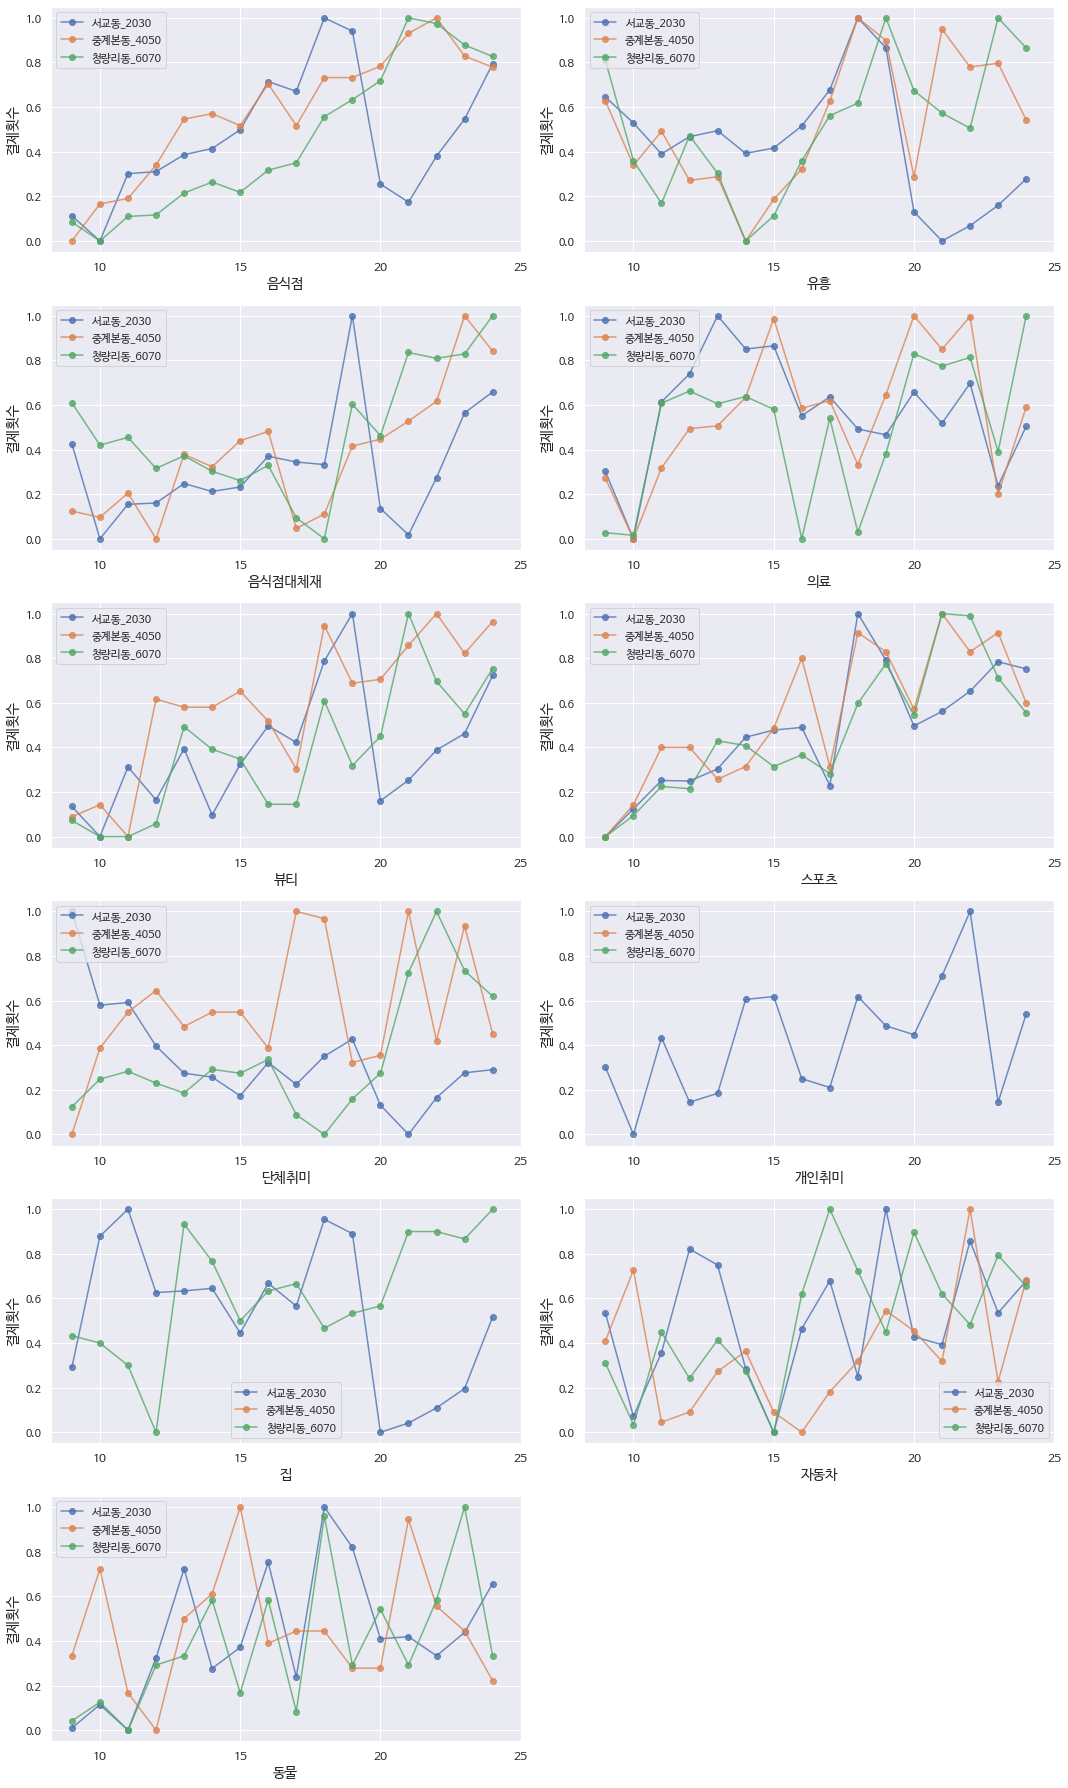

In [63]:
plt.figure(figsize = (15, 25))

for j in range(1, len(cate_man)+1):
  plt.subplot(6, 2, j)
  cate_line('서교동', j-1, '2030')
  cate_line('중계본동', j-1, '4050')
  cate_line('청량리동', j-1, '6070')

  plt.xticks(np.arange(10, 26, 5), np.arange(10, 26, 5), fontsize = 12)
  plt.xlabel(cate_man[j-1], fontsize = 14)
  plt.ylabel('결제횟수', fontsize = 14)
  plt.legend()


plt.tight_layout()

- 대부분의 업종에서 2030세대의 소비변화가 가장 큼
- 스포츠 분야에서는 모든 세대의 소비가 증가하는 추세를 보임

## 그 중 서교동(2030그룹) 소비 변화율 파악

In [64]:
def cate_2030(week):

  lst = []
  for idx, val in enumerate(cate_man):
    data = card2030[card2030['업종분류명'] == val].groupby('주')['결제횟수'].sum()
    lst.append(((data.loc[week] - data.loc[week - 2]) / data.loc[week - 2]) * 100)

  dic = dict()
  for idx, val in enumerate(cate_man):
    dic[val] = lst[idx]
    
  dic_sort = sorted(dic.items(), reverse=True, key= lambda item: item[1])
  dic_sort = dict(dic_sort)
  dic_key = list(dic_sort.keys())
  dic_val = list(dic_sort.values())

  df = pd.DataFrame(index = range(0,len(cate_man)), columns = ['Industry name', 'Increase/decrease rate'])

  for i in range(len(dic_key)):
    df.iloc[i, 0] = dic_key[i]
    df.iloc[i, 1] = dic_val[i]
  
  return df

In [65]:
card2030 = card[card['행정동명'] == '서교동']

In [66]:
cate_bar(cate_2030(20), 20) # 서울 전체 기준보다 유흥 감소폭이 더 큼

In [67]:
cate_bar(cate_2030(11), 11)

In [68]:
cate_bar(cate_2030(17), 17)

### 결론 
- 업종별로 소비 변화를 확인했을 때, 스포츠, 개인취미, 뷰티 등의 분야에서 소비가 꾸준히 증가하는 양상을 보임 
- 업종별 소비 변화율을 확인했을 때, 1차 확산 보다는 2차 확산에서 소비 변화가 더 크게 일어남

    특히, 1차 확산때보다 2차 확산 때 의료 업종에 대한 소비가 높아졌고, 유흥업종에 대한 소비가 큰 변화량으로 줄었음 

- 연령대별로 업종에 대한 소비 비중이 다름을 확인함
- 코로나 확산에 따른 소비의 변화는 2030세대가 다른 세대보다 크게 일어남

### +)
- 카드 데이터에서 업종을 주관적인 기준으로 분류했는데, 객관적으로 분류할 수 있는 방법에 대해 더 공부해야할 것 같음
- 카드 데이터에 연령대에 대한 정보가 없어 유동인구를 기준으로 연령대를 추측해 분석한 것이 아쉬움

    (카드 데이터에 연령대에 대한 정보도 같이 있었으면 더 정확한 분석을 할 수 있었을 것 같음)